In [1]:
2*2

4

In [2]:
Threads.nthreads()

4

In [1]:
using LinearAlgebra
using Distributions
#using Plots
#using LaTeXStrings
#using Printf
using FileIO
import JLD2

In [2]:
using DataFrames
#using StatsPlots

In [3]:
using Revise
using Newtrinos
using Newtrinos.osc

In [4]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
  [336ed68f] CSV v0.10.15
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [5]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.1, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = LogUniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=70.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#45"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(Oscillatio

In [6]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec=Newtrinos.xsec.configure()

physics = (; osc, atm_flux, earth_layers, xsec);

In [7]:
experiments = (
 
   minos= Newtrinos.minos.configure(physics),
);

[ Info: Loading minos data


In [8]:
p = Newtrinos.get_params(experiments)

(N = 20.0, m₀ = 0.1, nc_norm = 1.0, nutau_cc_norm = 1.0, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [ ]:
img = experiments.minos.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/profiled plot/minos/minos_data_NND_ratio.png", img)

In [9]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (r=31,N=31)  

modified_priors = (
    N = all_priors.N, 
    m₀= p.m₀,
    r =all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ = p.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)


(N = Uniform{Float64}(a=1.0, b=70.0), m₀ = 0.1, r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [10]:

likelihood = Newtrinos.generate_likelihood(experiments);


In [ ]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress:  71%|█████████████████████████████            |  ETA: 0:39:43

In [ ]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [11]:
JLD2.@load "scan_minos_rN_m0=0.1_NNM.jld2" result

1-element Vector{Symbol}:
 :result

In [6]:
using CairoMakie

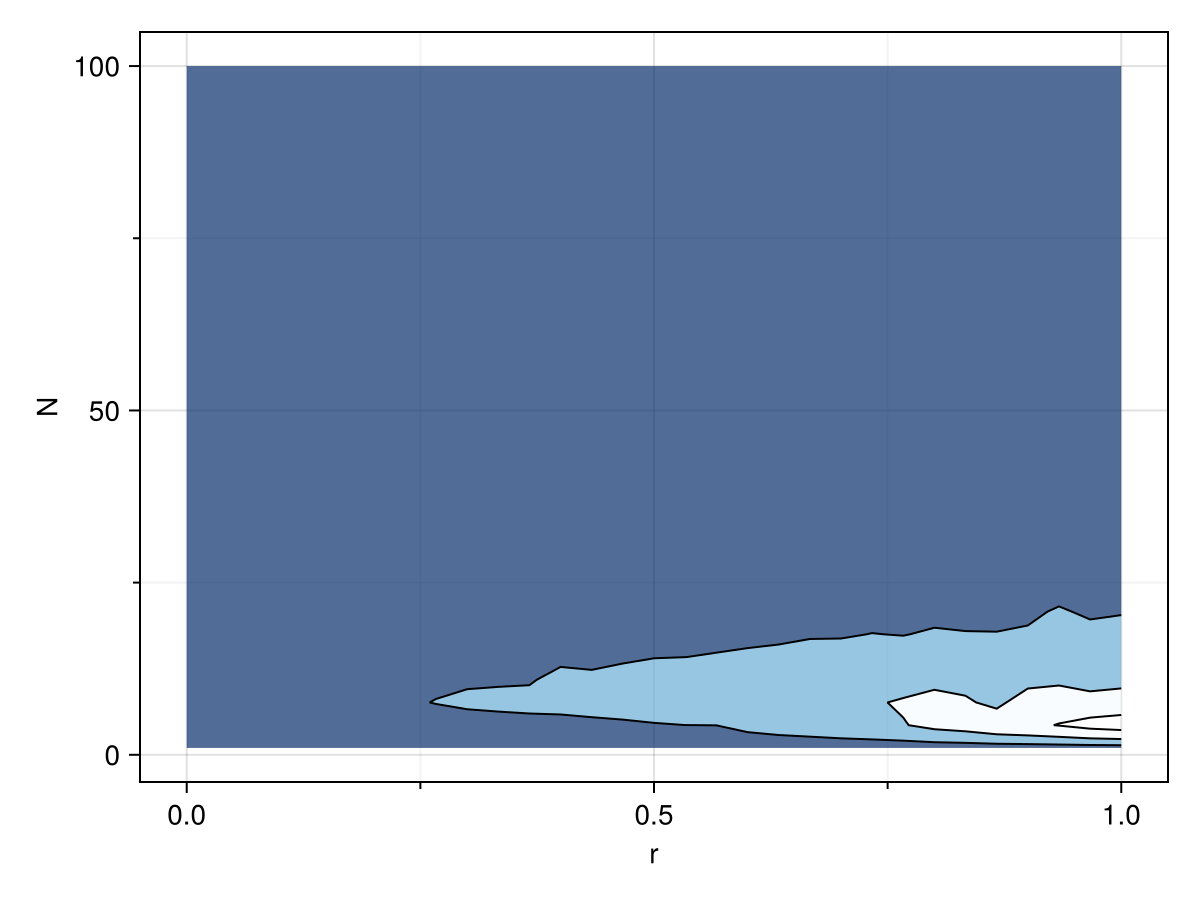

In [12]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/profiled plot/minos/minos_rN_m0=0.1_NNM.png", img)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


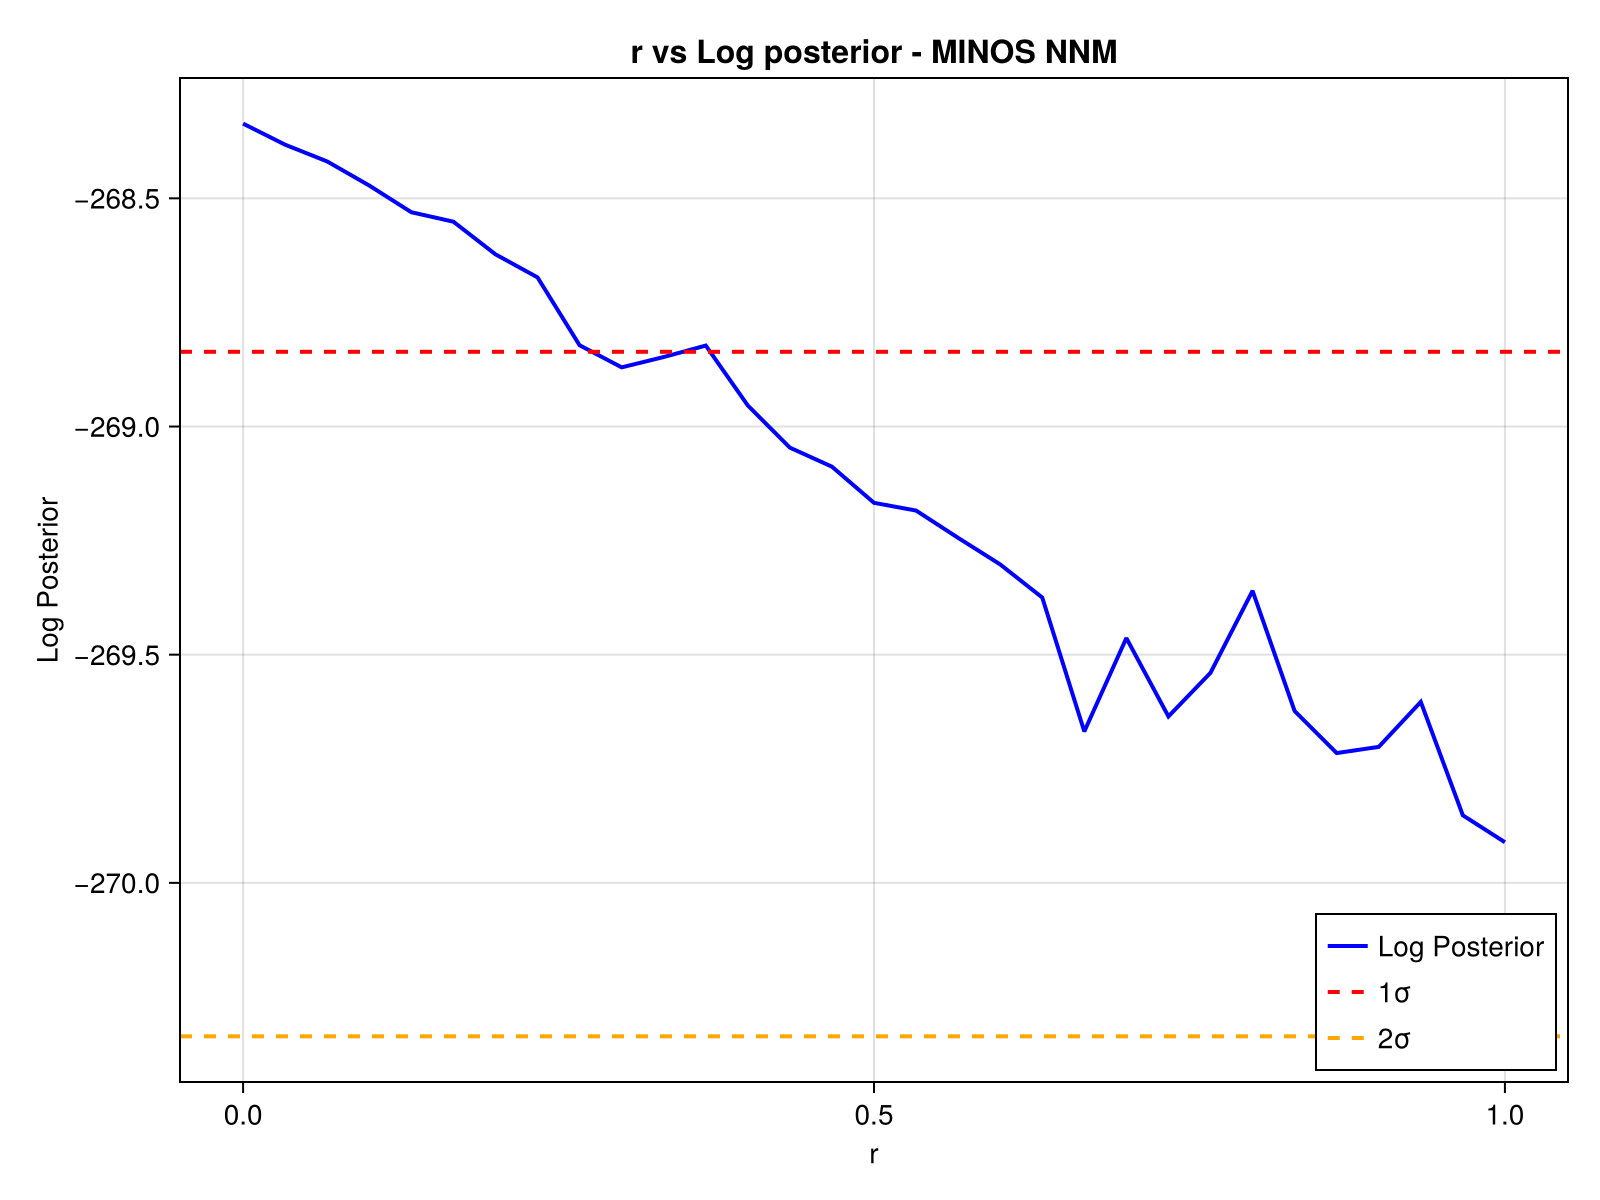

In [14]:
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, 5]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, 5]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior - MINOS NNM",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, 5],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/minos/minos_rLogpost_N=15_m0=0.1_NNM.png", fig)


In [20]:
include("pipeline.jl")

pipeline_plot (generic function with 1 method)

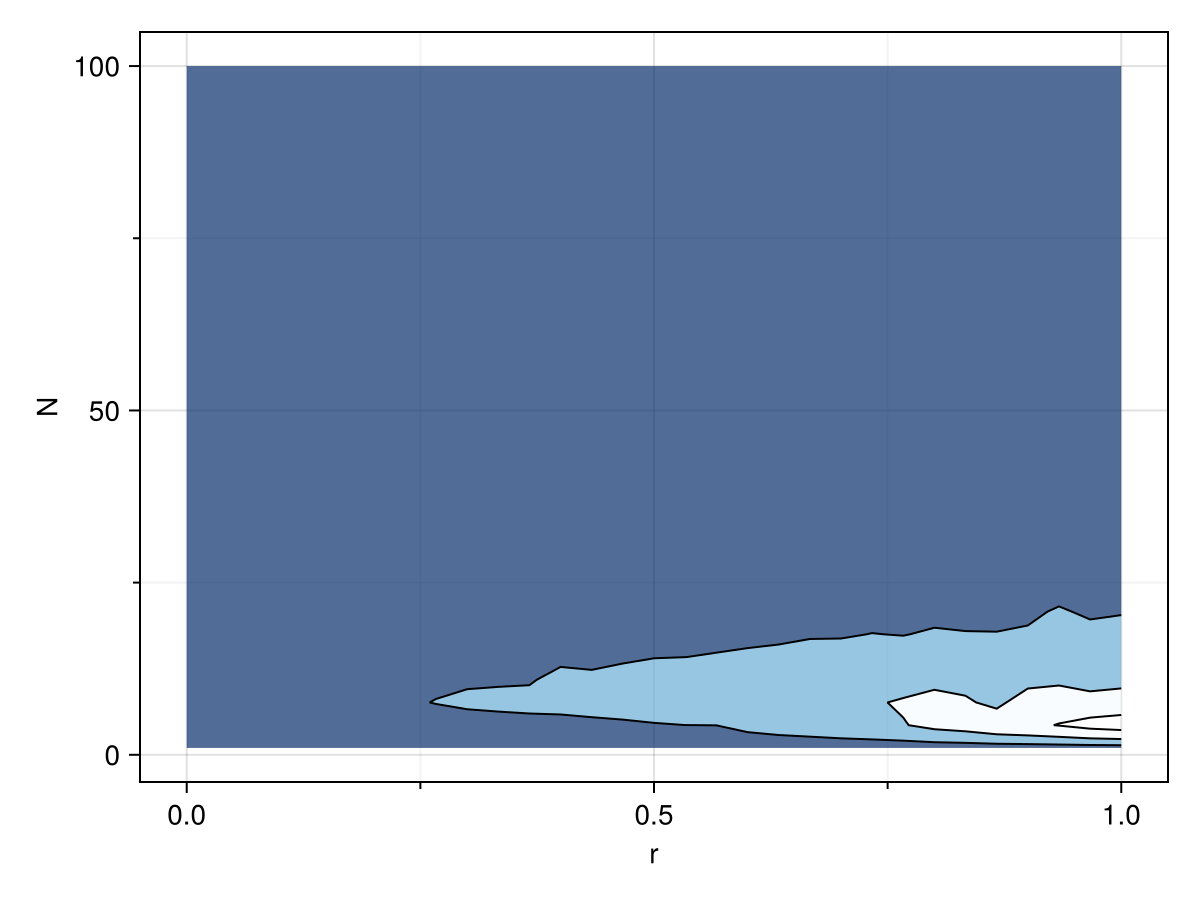

Nindex: 9
Nfixed: 25


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


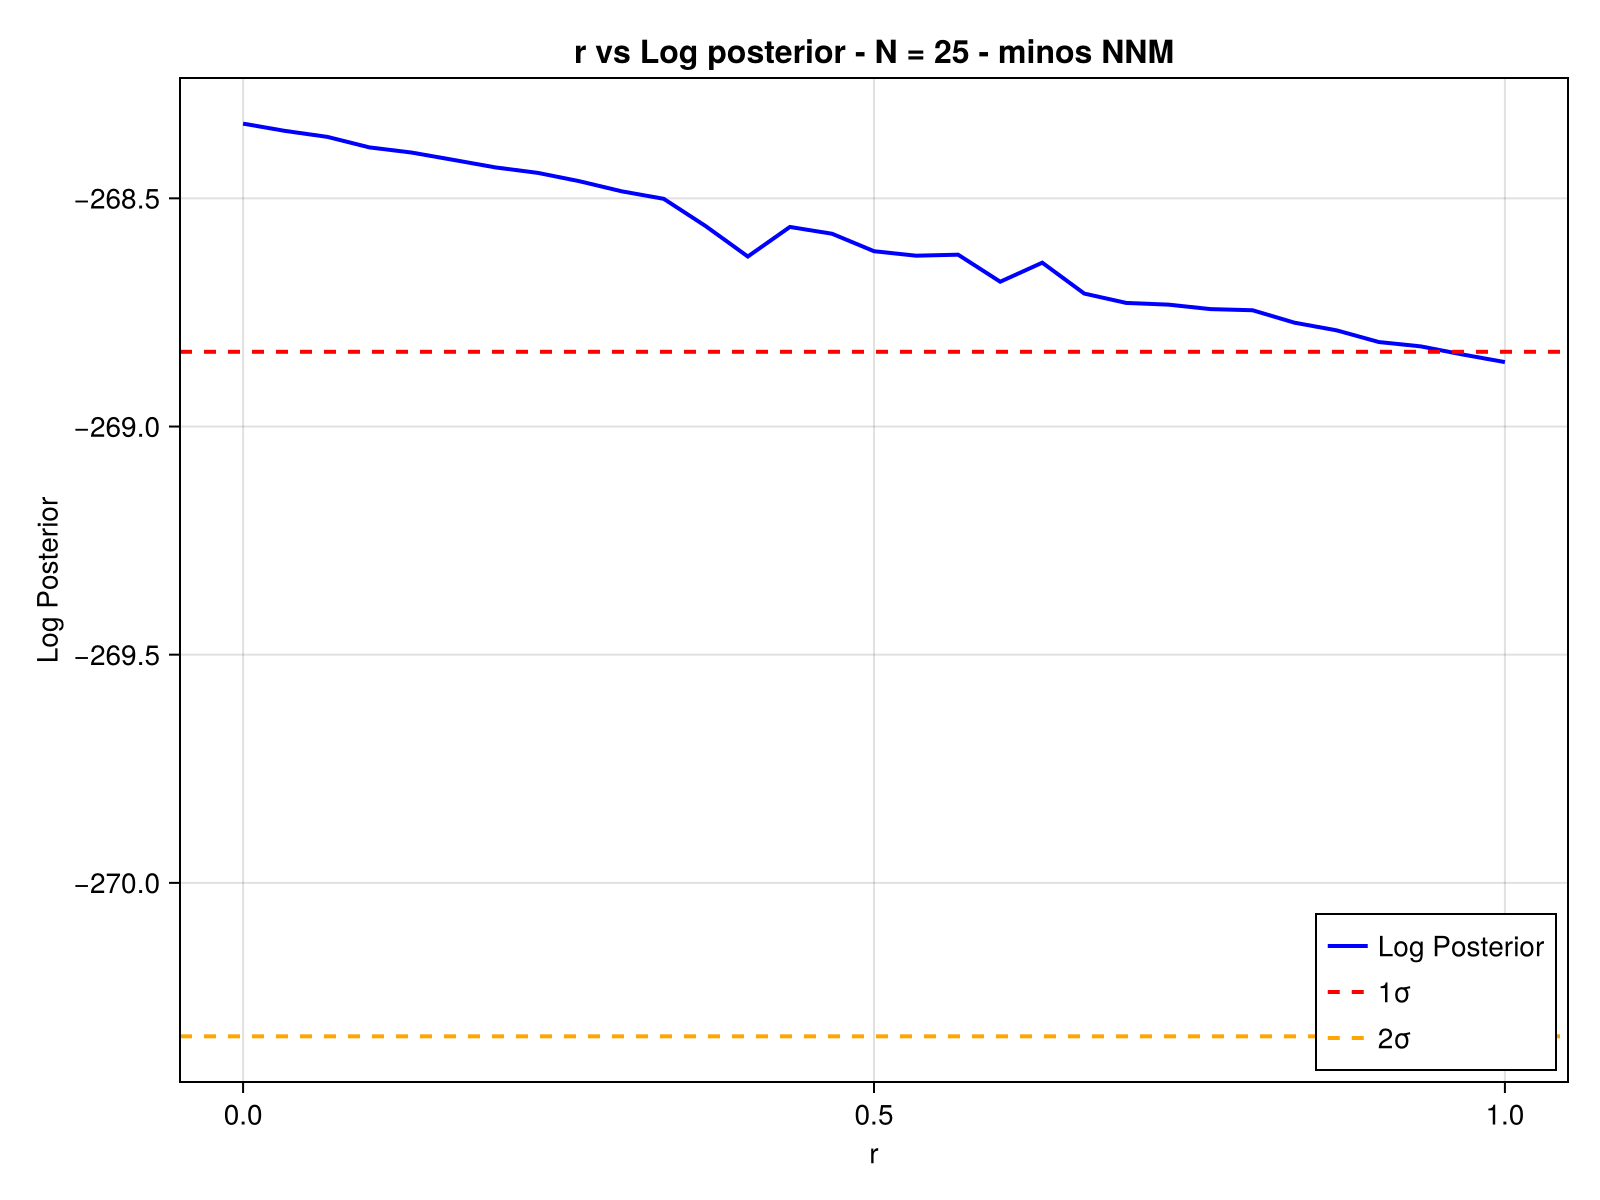

In [21]:
pipeline_plot("scan_minos_rN_m0=0.1_NNM.jld2", "minos", "NNM", 70, 20)

Likelihood ratio test


In [14]:
JLD2.@load "scan_kamland_deltatheta_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_kamland_deltatheta_NND_20.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

Likelihood Ratio Test Results:
Λ: -0.407
Degrees of freedom: 2
p-value: 1.0


1.0

Oscillations


In [ ]:

# STANDARD MODEL
E_range = range(1, 14, length=1000) 
L=735
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec_SM = Newtrinos.xsec.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers, xsec);


experiments_SM = (
 
   minos = Newtrinos.minos.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

[ Info: Loading minos data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9489321604003039
 0.9466635149952564
 0.9444783922937747
 0.9423798860721937
 0.9403701870815699
 0.9384506970120305
 0.9366221315338682
 0.9348846131146719
 0.9332377543369073
 0.9316807324436446
 0.9302123558274096
 0.9288311231530293
 0.9275352757734635
 ⋮
 0.997765671262896
 0.9977698242739018
 0.9977739657522575
 0.9977780957404896
 0.9977822142809301
 0.9977863214157162
 0.9977904171867921
 0.9977945016359102
 0.997798574804632
 0.9978026367343295
 0.9978066874661843
 0.997810727041192

[:, :, 2, 1] =
 0.014903661873465961
 0.016009786956010803
 0.01710308865437157
 0.018179665071153834
 0.01923615202588561
 0.02026967649570886
 0.021277812217017356
 0.02225853769167289
 0.0232101967411453
 0.024131461673578637
 0.02502129906844023
 0.025878938137731747
 0.02670384158894576
 ⋮
 0.0013559408488081287
 0.0013534499688990492
 0.0013509659214577569
 0.0013484886816132323
 0.00134601822460705
 0.0013435545257927922
 0.0013410975606354574

In [ ]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=false)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=false)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=false)
probab_50 = osc_prob(collect(E_range), L_vec, p_50;anti=false)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=false)
probab_025 = osc_prob(collect(E_range), L_vec, p_025;anti=false)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=false)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=false)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9419522051459019
 0.9328559624940974
 0.9294756092347384
 0.9332491767372747
 0.9263880648512439
 0.9290010097727543
 0.9222905205526329
 0.9258436823778695
 0.9194532209102929
 0.9171088244118226
 0.9171231197731965
 0.9213329595876268
 0.921193151835705
 ⋮
 0.9918299079090881
 0.9886641074872351
 0.9863170742570866
 0.9901433916831831
 0.9920508346262845
 0.9904769391326648
 0.990676469605028
 0.9925458485123211
 0.992867235608372
 0.9924516092984916
 0.9904715017868295
 0.9907733192409919

[:, :, 2, 1] =
 0.03247110642982078
 0.03426202382507816
 0.035757109389989966
 0.037896770082587086
 0.03900493909443558
 0.040158203059537656
 0.041644321415561784
 0.043760904367193515
 0.044084564824224536
 0.045876921659119704
 0.04704349316798211
 0.04854183749102223
 0.04865763941011604
 ⋮
 0.0013506134051204273
 0.0014188332323042468
 0.001396682390174569
 0.001398530530472692
 0.001314293813270662
 0.0014101733094630344
 0.0014202341382142

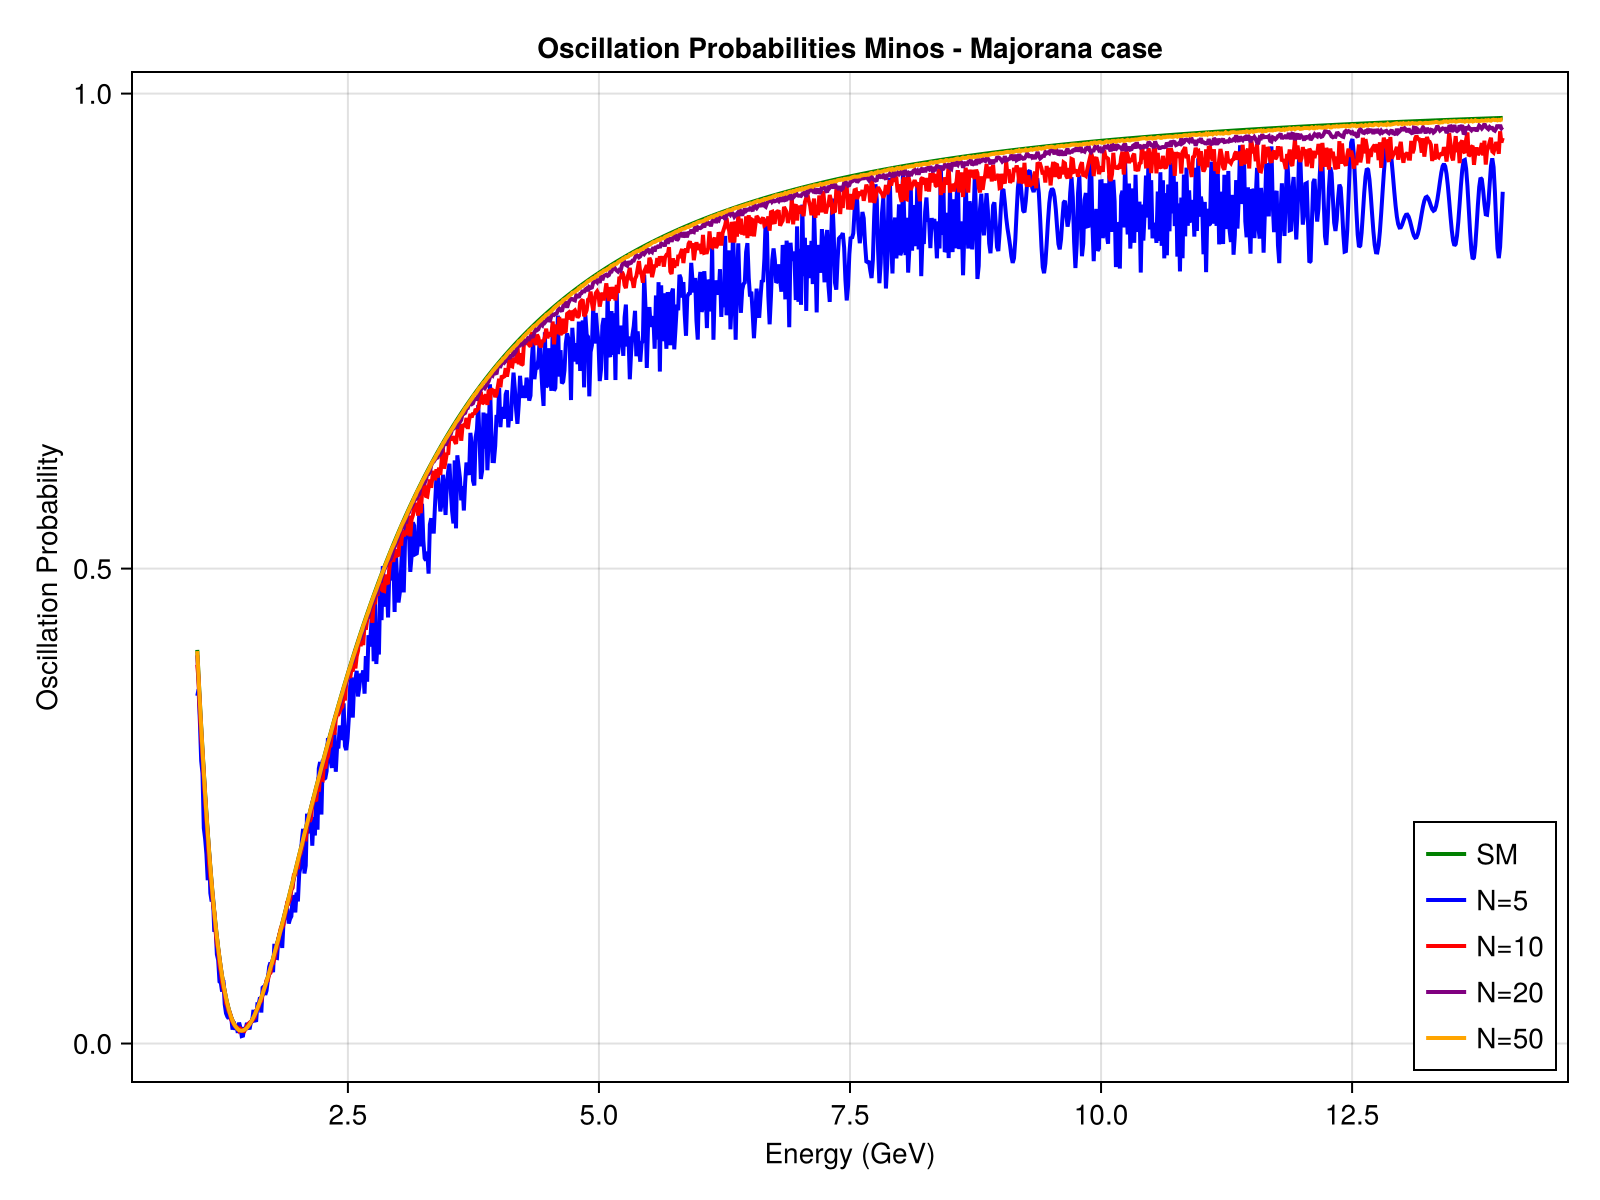

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Minos - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 2, 2], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 2, 2], label="N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 2, 2], label="N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1, 2, 2], label="N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1, 2, 2], label="N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/minos/osc_minos_N_majorana.png", fig)

fig

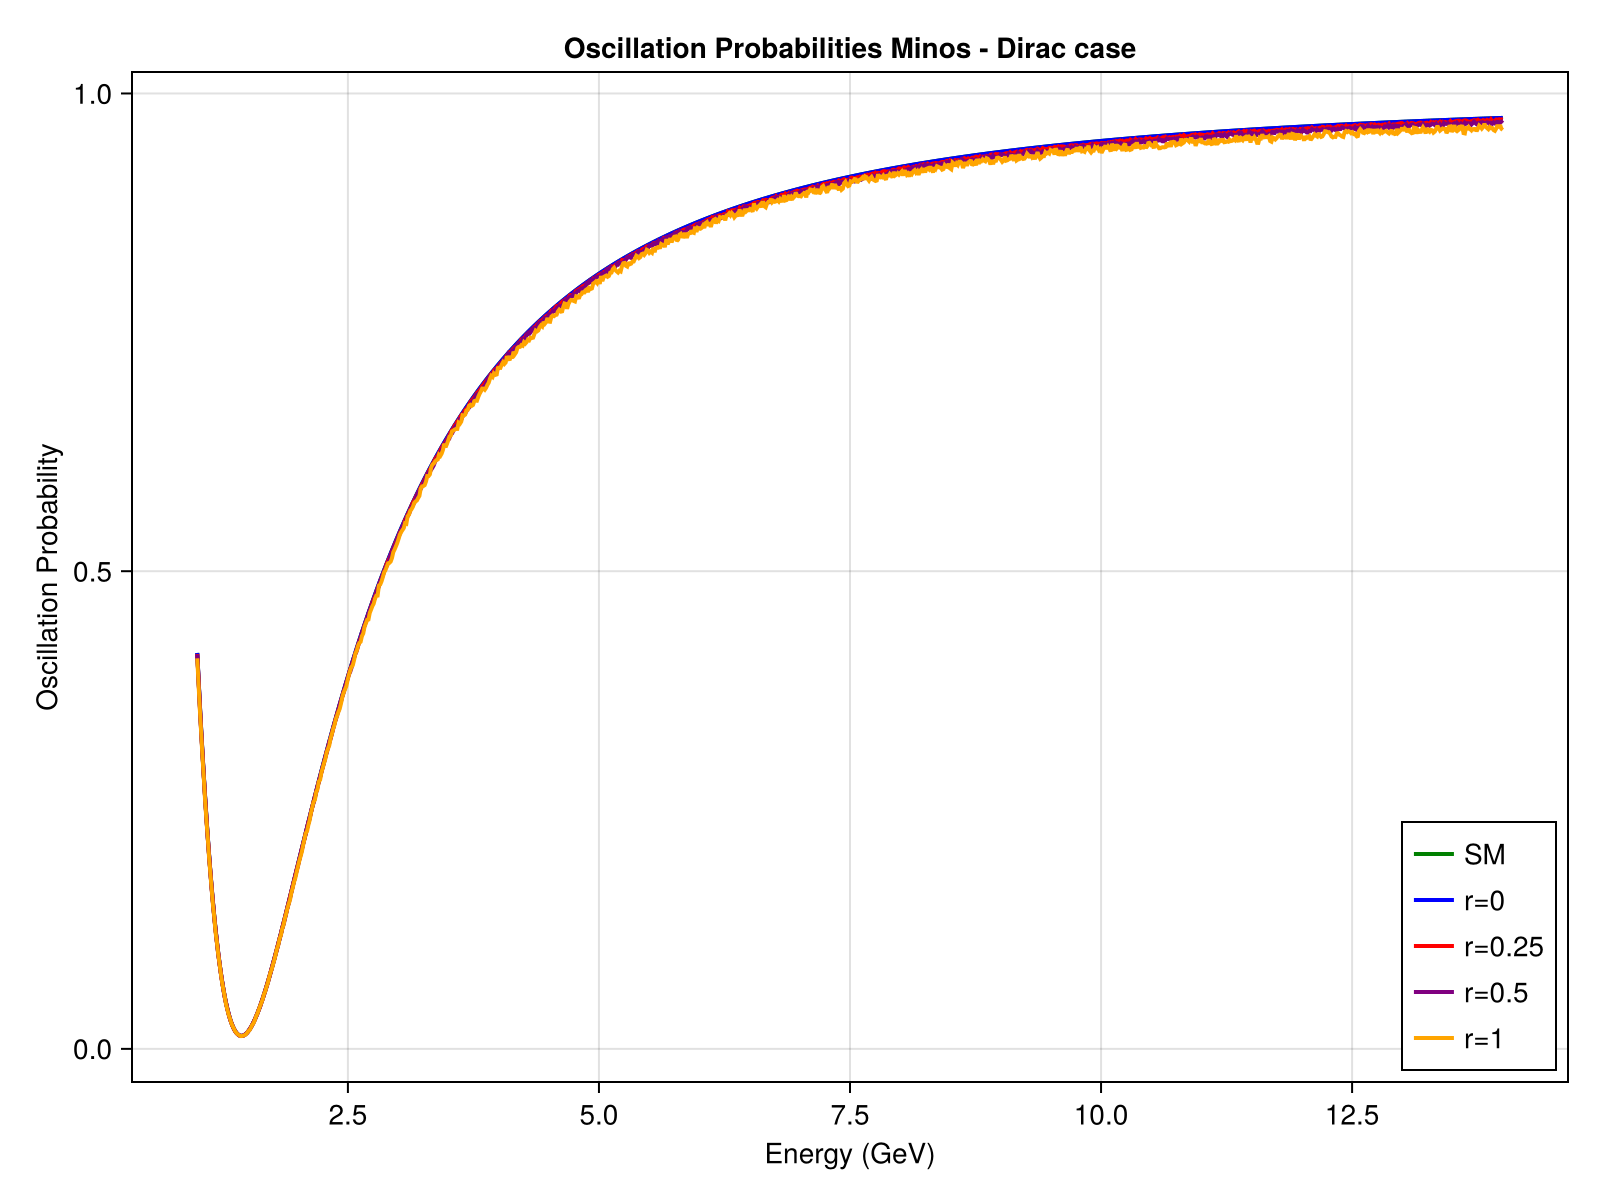

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Minos - Dirac case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1,  2 ,2 ], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1,  2 ,2 ], label="r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1,  2 ,2 ], label="r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 2 ,2 ], label="r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 2 ,2 ], label="r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/minos/osc_minos_r_majorana.png", fig)

fig